<a href="https://colab.research.google.com/github/alonsosilvaallende/COVID-19/blob/master/COVID_19_Chile_Total_Fallecidos_por_Region.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')

In [0]:
data = pd.DataFrame()

In [0]:
data_raw = pd.read_csv("https://raw.githubusercontent.com/alonsosilvaallende/Datos-COVID19/master/output/producto4/2020-03-24-CasosConfirmados-totalRegional.csv", index_col='Region')

In [4]:
data_raw.head(3)

,Casos nuevos,Casos totales,Fallecidos
Region,,,
Arica y Parinacota,0,2,0
Tarapacá,1,1,0
Antofagasta,0,11,0


In [0]:
data['2020-03-24'] = data_raw['Fallecidos']

In [6]:
data_raw['Fallecidos']

Region
Arica  y  Parinacota    0
Tarapacá                0
Antofagasta             0
Atacama                 0
Coquimbo                0
Valparaíso              0
Metropolitana           1
O’Higgins               0
Maule                   0
Ñuble                   0
Biobío                  0
Araucanía               0
Los  Ríos               0
Los  Lagos              0
Aysén                   0
Magallanes              0
Total                   1
Name: Fallecidos, dtype: int64

In [0]:
first_death_date = '2020-03-24'

In [0]:
today = '2020-04-14'

In [9]:
total_days = (pd.to_datetime(today)-pd.to_datetime(first_death_date)).days
total_days

21

In [0]:
for i in np.arange(total_days+1):
  date = (pd.to_datetime(first_death_date)+pd.DateOffset(i)).strftime('%Y-%m-%d')
  s = "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto4/" + date + "-CasosConfirmados-totalRegional.csv"
  data_by_date = pd.read_csv(s)
  if 'Fallecidos' in data_by_date.columns:
    data[date] = data_by_date["Fallecidos"].values
  elif 'Casos fallecidos' in data_by_date.columns:
    data[date] = data_by_date["Casos fallecidos"].values
  else:
    data[date] = data_by_date[" Casos fallecidos"].values

In [11]:
data.head(3)

,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14
Region,,,,,,,,,,,,,,,,,,,,,,
Arica y Parinacota,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
Tarapacá,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Antofagasta,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1


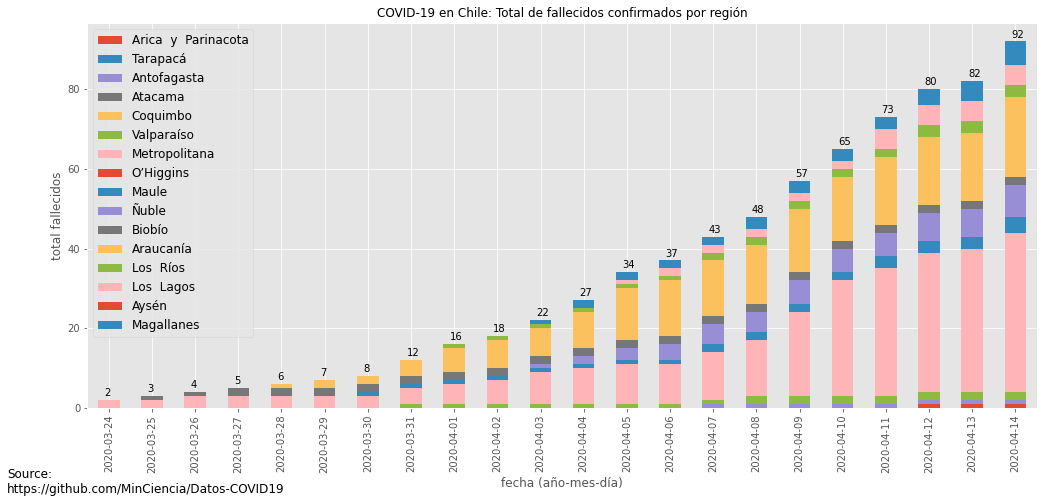

In [12]:
fig, ax = plt.subplots(figsize=(14,7))
data[:-1].T.plot(ax=ax, kind="bar", stacked=True)
for i, val in enumerate(data.loc['Total']):
  ax.text(i-0.1, val+1, str(int(val)), fontsize=10)
plt.legend(fontsize='large')
ax.set_title(f'COVID-19 en Chile: Total de fallecidos confirmados por región', fontsize='large')
ax.set_xlabel(f'fecha (año-mes-día)', fontsize='large')
ax.set_ylabel(f'total fallecidos', fontsize='large')
fig.tight_layout()
plt.annotate('Source:\nhttps://github.com/MinCiencia/Datos-COVID19', (0,0), (-80,-60), fontsize='large', xycoords='axes fraction', textcoords='offset points', va='top')
plt.savefig('2020-04-15-COVID-19-Chile-Fallecidos.png', bbox_inches='tight', format='png', dvi=700)

In [0]:
from google.colab import files
files.download("2020-04-15-COVID-19-Chile-Fallecidos.png")

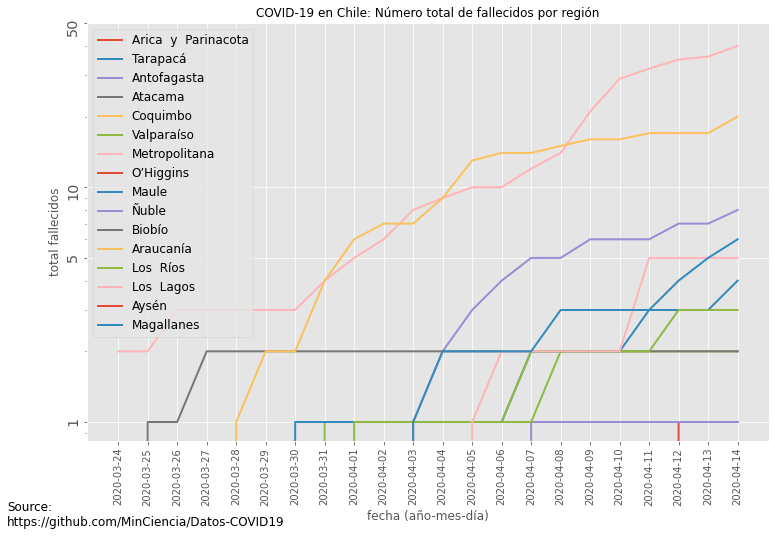

In [14]:
fig, ax = plt.subplots(figsize=(10,7))
for region in data.index[:-1]:
  ax.plot(data.keys(), data.loc[region], label=region, linewidth=2)
ax.tick_params(labelrotation=90)
fig.tight_layout()
plt.annotate('Source:\nhttps://github.com/MinCiencia/Datos-COVID19', (0,0), (-80,-60), fontsize='large', xycoords='axes fraction', textcoords='offset points', va='top')

ax.set_yscale("log")
ax.set_yticks([1, 5, 10, 50])
ax.set_yticklabels(['1', '5', '10', '50'], fontsize='x-large')
ax.set_title(f'COVID-19 en Chile: Número total de fallecidos por región', fontsize='large')
ax.set_xlabel(f'fecha (año-mes-día)', fontsize='large')
ax.set_ylabel(f'total fallecidos', fontsize='large')
plt.ylim(top=50)
plt.legend(fontsize='large')
plt.savefig('2020-04-15-COVID-19-Chile-Fallecidos_logscale.png', bbox_inches='tight', format='png', dvi=700)

In [0]:
from google.colab import files
files.download("2020-04-15-COVID-19-Chile-Fallecidos_logscale.png")